# A quick demo of dabl on some toy datasets and slightly more interesting datasets

# Scikit-learn build-in datasets:

## Wine classification

In [1]:
import dabl
from sklearn.datasets import load_wine
wine_df = dabl.utils.data_df_from_bunch(load_wine())
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


/home/amueller/public/dabl/dabl/plot/supervised.py:538: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."


Target looks like classification
Linear Discriminant Analysis training set score: 1.000


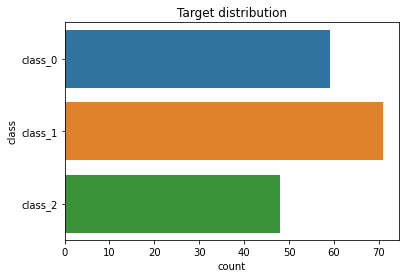

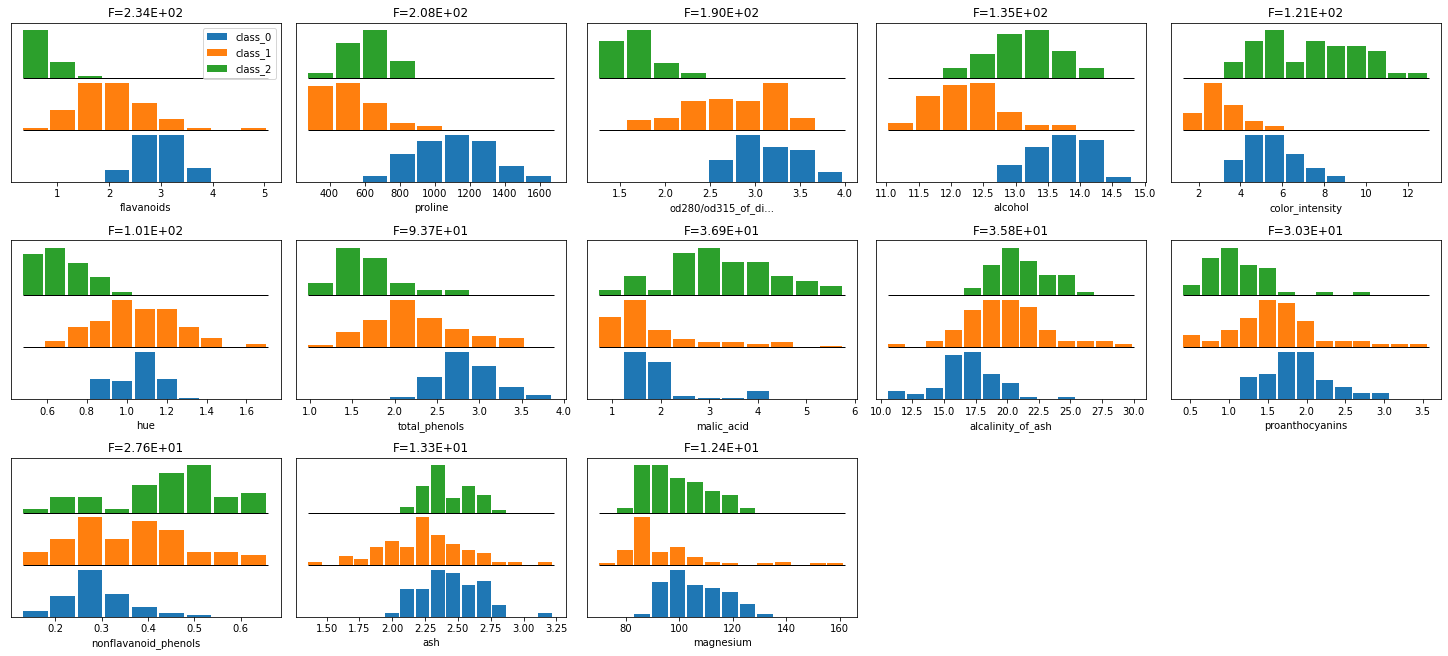

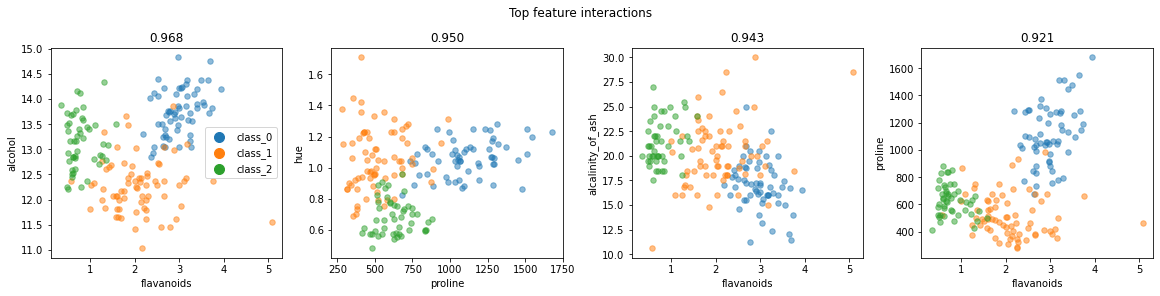

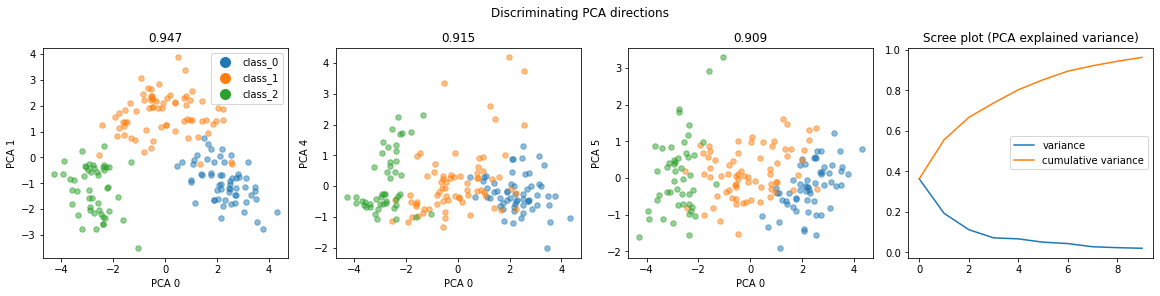

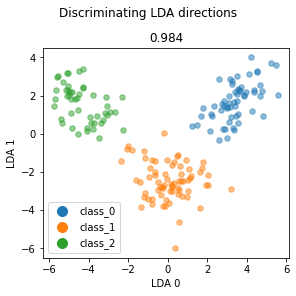

In [2]:
dabl.plot(wine_df, 'target')

In [3]:
# obviously LDA solved the problem as we can see in the last plot. I might just want to use LDA or another linear model.
# Or we see what the SimpleClassifier does:
sc = dabl.SimpleClassifier()
sc.fit(wine_df, target_col='target')

Running DummyClassifier(strategy='prior')
accuracy: 0.399 recall_macro: 0.333 precision_macro: 0.133 f1_macro: 0.190
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.399 recall_macro: 0.333 precision_macro: 0.133 f1_macro: 0.190

Running GaussianNB()
accuracy: 0.972 recall_macro: 0.975 precision_macro: 0.971 f1_macro: 0.972
=== new best GaussianNB() (using recall_macro):
accuracy: 0.972 recall_macro: 0.975 precision_macro: 0.971 f1_macro: 0.972

Running MultinomialNB()
accuracy: 0.938 recall_macro: 0.941 precision_macro: 0.952 f1_macro: 0.941
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.528 recall_macro: 0.579 precision_macro: 0.400 f1_macro: 0.456
Running DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.932 recall_macro: 0.934 precision_macro: 0.938 f1_macro: 0.932
Running DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0.01)
accuracy: 0.960 recall_macro: 0.958 precision_m

SimpleClassifier()

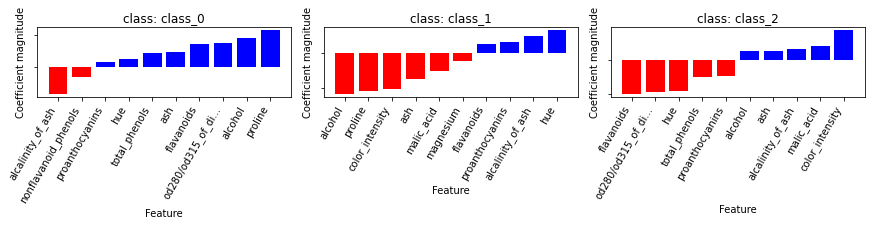

In [4]:
# logistic regression has slightly higher accuracy and macro-average recall (which is the main metric we use)
# than linear discriminant analysis. Not really a shocker.
dabl.explain(sc)

Interestingly the large coefficients don't really correspond to what's shown in the univariate or pairplots. Possibly because the data is very correlated? Who knows!
I assume we could create a simpler model with less features from the plots above. Maybe lasso next time?

## Ames housing dataset

In [5]:
ames_df = dabl.datasets.load_ames()
ames_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


/home/amueller/public/dabl/dabl/plot/supervised.py:538: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."
/home/amueller/public/dabl/dabl/preprocessing.py:343: UserWarning: Discarding near-constant features: ['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating', 'Low Qual Fin SF', 'Kitchen AbvGr', 'Garage Cond', '3Ssn Porch', 'Pool Area', 'Misc Val']
  warn("Discarding near-constant features: {}".format(


Target looks like regression
Showing only top 10 of 26 continuous features


/home/amueller/public/dabl/dabl/plot/utils.py:628: UserWarning: Dropped 5 outliers in column Gr Liv Area.
  warn("Dropped {} outliers in column {}.".format(
/home/amueller/public/dabl/dabl/plot/utils.py:628: UserWarning: Dropped 1 outliers in column Garage Cars.
  warn("Dropped {} outliers in column {}.".format(
/home/amueller/public/dabl/dabl/plot/utils.py:628: UserWarning: Dropped 2 outliers in column Total Bsmt SF.
  warn("Dropped {} outliers in column {}.".format(
/home/amueller/public/dabl/dabl/plot/utils.py:628: UserWarning: Dropped 4 outliers in column 1st Flr SF.
  warn("Dropped {} outliers in column {}.".format(
/home/amueller/public/dabl/dabl/plot/utils.py:628: UserWarning: Dropped 1 outliers in column Garage Yr Blt.
  warn("Dropped {} outliers in column {}.".format(
/home/amueller/public/dabl/dabl/plot/utils.py:628: UserWarning: Dropped 7 outliers in column Mas Vnr Area.
  warn("Dropped {} outliers in column {}.".format(


Showing only top 10 of 42 categorical features


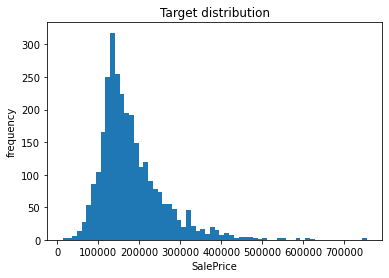

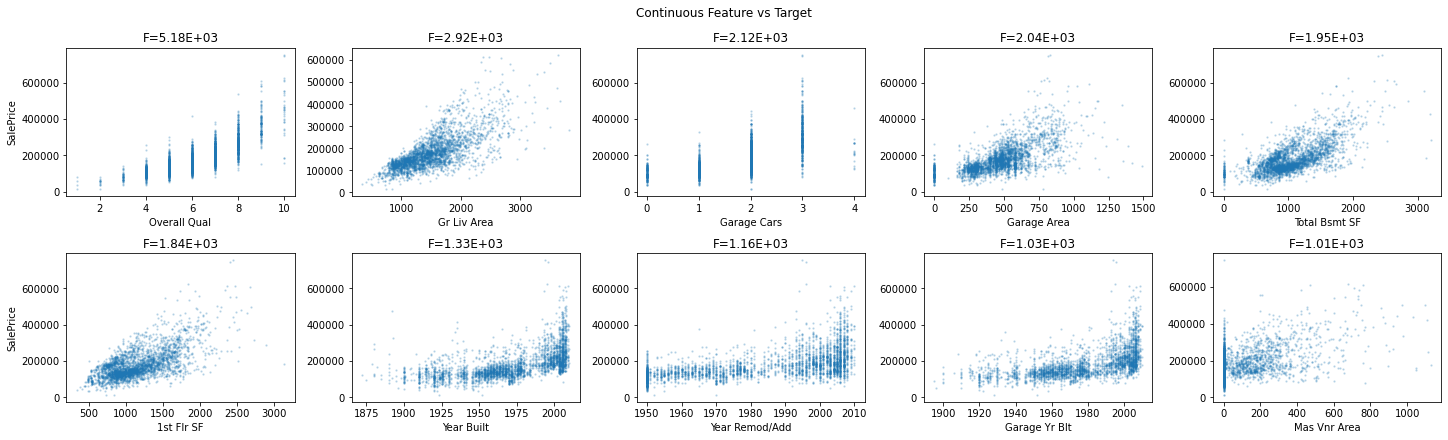

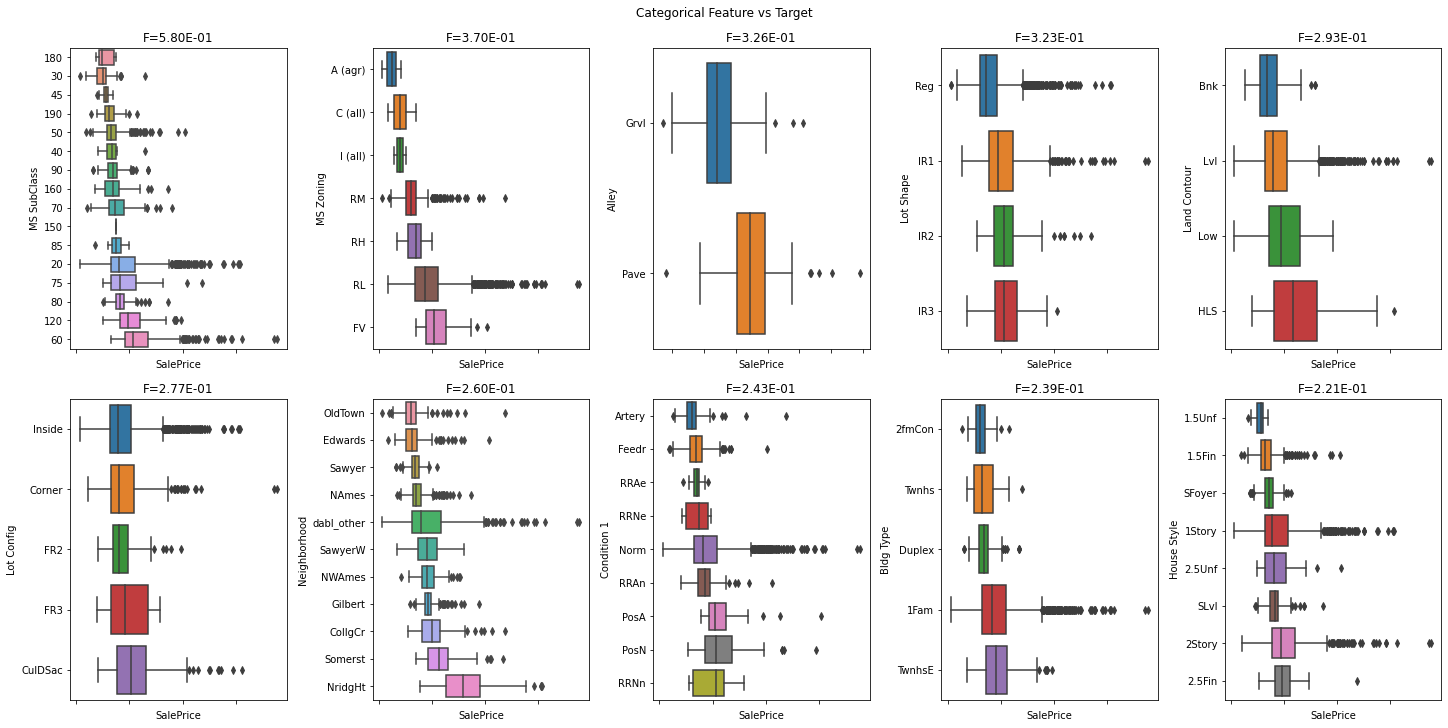

In [6]:
dabl.plot(ames_df, 'SalePrice')

You can see that high-ordinality categorical variables were summarized with rare categories binned into "dabl_other".
Also, ``GarageCars`` should maybe be plotted as a categorical variable - and there's a garage that will be build in 2200 (it's the outlier that's dropped). Huh.
We were pretty aggressive with dropping "near-constant" features. Maybe being less agressive might be good in some situations?
``Overall Qual`` might also arguably be better shown as a categorical feature, though it's a bit unclear.

/home/amueller/public/dabl/dabl/plot/supervised.py:538: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."
/home/amueller/public/dabl/dabl/preprocessing.py:343: UserWarning: Discarding near-constant features: ['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating', 'Low Qual Fin SF', 'Kitchen AbvGr', 'Garage Cond', '3Ssn Porch', 'Pool Area', 'Misc Val']
  warn("Discarding near-constant features: {}".format(


Target looks like regression
Showing only top 10 of 25 continuous features


/home/amueller/public/dabl/dabl/plot/utils.py:628: UserWarning: Dropped 5 outliers in column Gr Liv Area.
  warn("Dropped {} outliers in column {}.".format(
/home/amueller/public/dabl/dabl/plot/utils.py:628: UserWarning: Dropped 2 outliers in column Total Bsmt SF.
  warn("Dropped {} outliers in column {}.".format(
/home/amueller/public/dabl/dabl/plot/utils.py:628: UserWarning: Dropped 4 outliers in column 1st Flr SF.
  warn("Dropped {} outliers in column {}.".format(
/home/amueller/public/dabl/dabl/plot/utils.py:628: UserWarning: Dropped 1 outliers in column Garage Yr Blt.
  warn("Dropped {} outliers in column {}.".format(
/home/amueller/public/dabl/dabl/plot/utils.py:628: UserWarning: Dropped 7 outliers in column Mas Vnr Area.
  warn("Dropped {} outliers in column {}.".format(
/home/amueller/public/dabl/dabl/plot/utils.py:628: UserWarning: Dropped 1 outliers in column TotRms AbvGrd.
  warn("Dropped {} outliers in column {}.".format(


Showing only top 10 of 43 categorical features


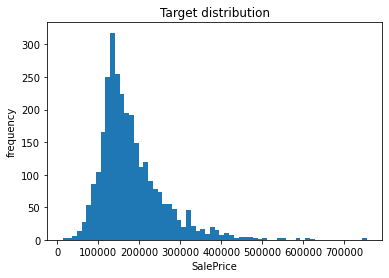

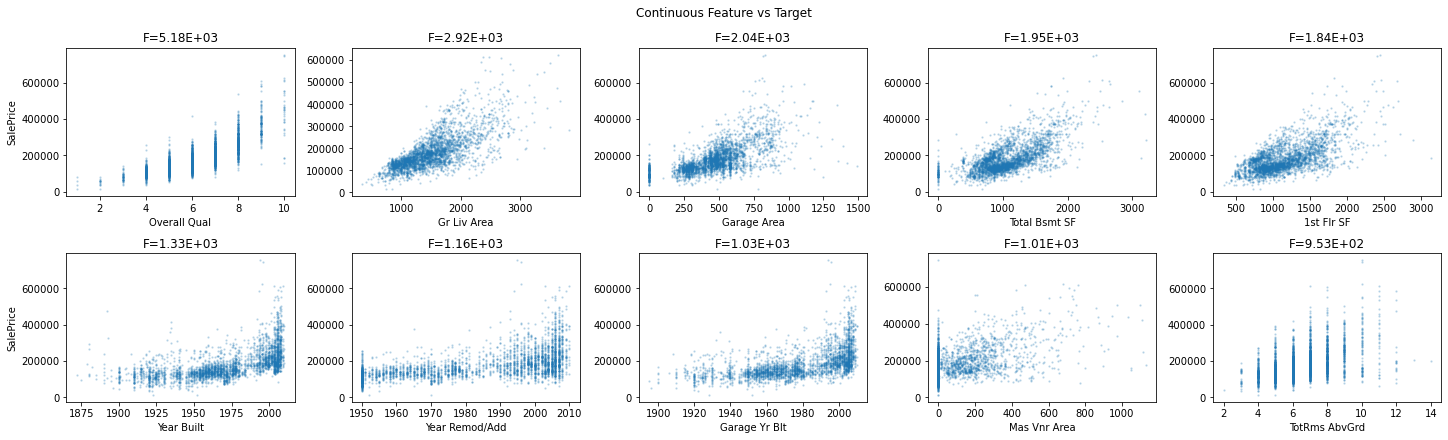

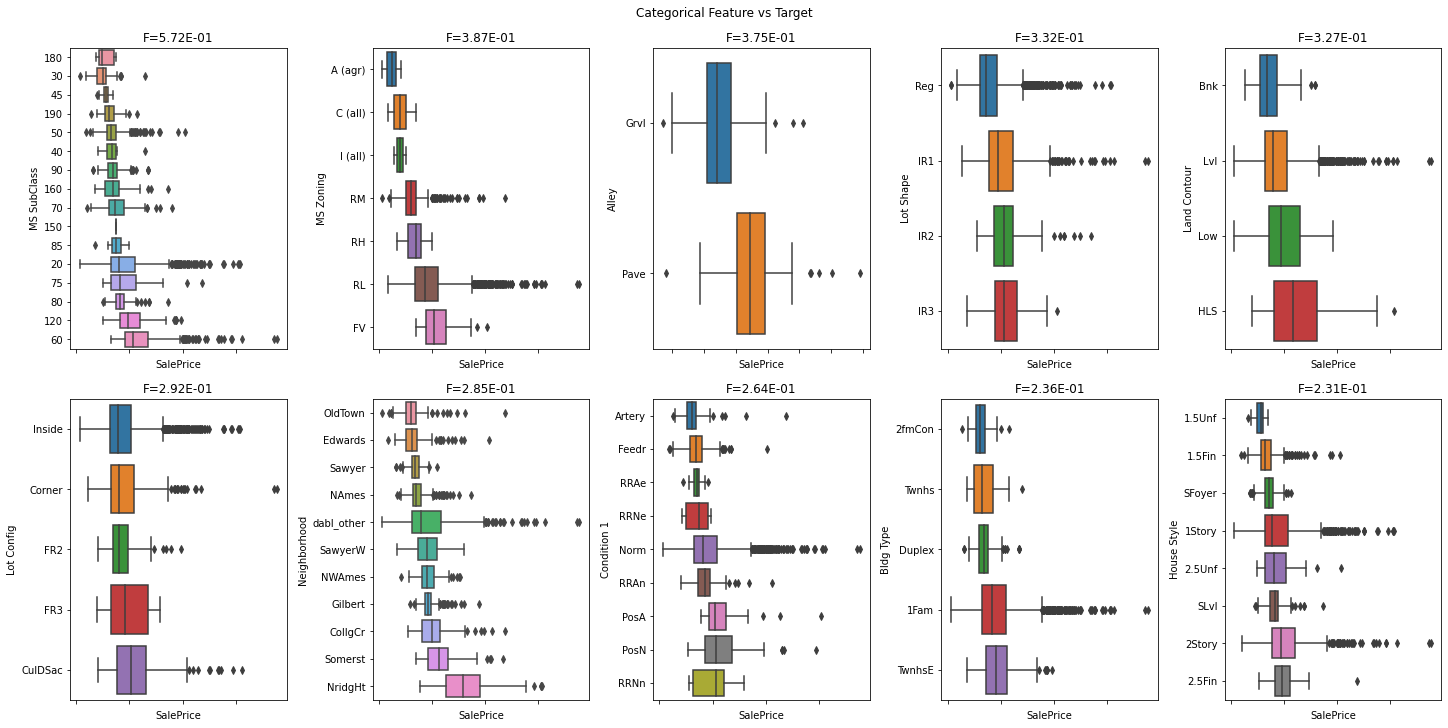

In [7]:
dabl.plot(ames_df, 'SalePrice', type_hints={'Garage Cars': 'categorical'})

In [8]:
sr = dabl.SimpleRegressor()
sr.fit(ames_df, target_col='SalePrice')

/home/amueller/public/dabl/dabl/preprocessing.py:343: UserWarning: Discarding near-constant features: ['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating', 'Low Qual Fin SF', 'Kitchen AbvGr', 'Garage Cond', '3Ssn Porch', 'Pool Area', 'Misc Val']
  warn("Discarding near-constant features: {}".format(


Running DummyRegressor()
r2: -0.002 neg_mean_squared_error: -6383497699.438
=== new best DummyRegressor() (using r2):
r2: -0.002 neg_mean_squared_error: -6383497699.438

Running DecisionTreeRegressor(max_depth=1)
r2: 0.471 neg_mean_squared_error: -3372119263.318
=== new best DecisionTreeRegressor(max_depth=1) (using r2):
r2: 0.471 neg_mean_squared_error: -3372119263.318

Running DecisionTreeRegressor(max_depth=5)
r2: 0.741 neg_mean_squared_error: -1640279163.881
=== new best DecisionTreeRegressor(max_depth=5) (using r2):
r2: 0.741 neg_mean_squared_error: -1640279163.881

Running Ridge(alpha=10)
r2: 0.851 neg_mean_squared_error: -926070615.119
=== new best Ridge(alpha=10) (using r2):
r2: 0.851 neg_mean_squared_error: -926070615.119



/home/amueller/miniconda3/envs/sklearn-stable/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113844339452.32886, tolerance: 1501587334.4354587
  model = cd_fast.enet_coordinate_descent(
/home/amueller/miniconda3/envs/sklearn-stable/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29886984920.31653, tolerance: 1523375238.2658575
  model = cd_fast.enet_coordinate_descent(
/home/amueller/miniconda3/envs/sklearn-stable/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5756202714.958008, tolerance: 1542357781.8156846
  model = cd_fast.enet_coordinate_descent(


Running Lasso(alpha=10)
r2: 0.827 neg_mean_squared_error: -1090858713.735

Best model:
Ridge(alpha=10)
Best Scores:
r2: 0.851 neg_mean_squared_error: -926070615.119


SimpleRegressor()

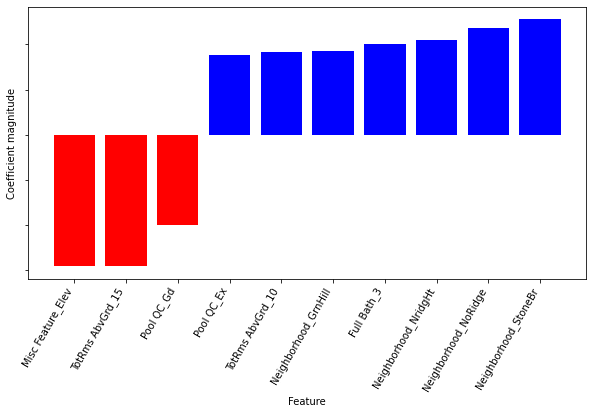

In [9]:
dabl.explain(sr)

In [16]:
# The neighborhood seems to dominate, no continuous variable is in the top 10 highest coefficients.